# **Definicion del dataset: NASA Exoplanets**
**Acerca del conjunto de datos**

El Archivo de exoplanetas de la NASA es una base de datos que contiene información sobre todos los exoplanetas conocidos (planetas fuera de nuestro sistema solar) descubiertos por las diversas misiones espaciales de la NASA, los observatorios terrestres y otras fuentes. El conjunto de datos incluye información como el nombre del planeta, la masa, el radio, la distancia desde su estrella anfitriona, el período orbital y otras características físicas. El conjunto de datos también incluye información sobre la estrella anfitriona, como su nombre, masa y radio. El archivo se actualiza regularmente a medida que se descubren nuevos exoplanetas y es un recurso valioso para los astrónomos que estudian las propiedades y la distribución de los exoplanetas en nuestra galaxia.

Total de registros: 5250

Total Columnas: 13

*   Flotante: 7
*   String: 5
*   Integer: 1



|Nombre Variable | Variable | Tipo | Descipcion                           |
|----------------|:---------|------|:-------------------------------------|
|name            | Cualitativa - Nominal  |string|Nombre del planeta                    |
|distance        |Cuantitativa - Continua  |float |Distancia de la tierra en años luz    |
|stellar_magnitude|Cuantitativa - Continua|float|Brillo del planeta, cuanto más brillante es el planeta, menor número se asigna al planeta|
|planet_type|Cualitativa - Ordinal|string|Tipo de planeta, estos tipos se derivan de los planetas de nuestro sistema solar|
|discovery_year|Cuantitativa - Discreta|int|Año en que fue descubierto|
|mass_multiplier|Cuantitativa - Continua|float|multiplicador de masa del planeta con mass_wrt planet|
|mass_wrt|Cualitativa - Nominal|string|masa del planeta en comparación con la masa de los planetas de nuestro sistema solar|
|radius_multiplier|Cuantitativa - Continua|float|multiplicador de radio del planeta con radius_wrt planet|
|radius_wrt|Cualitativa - Nominal|string|radio del planeta en comparación con el radio de los planetas de nuestro sistema solar|
|orbital_radius|Cuantitativa - Continua|float|Radio orbital de los planetas que orbitan alrededor de su sol (en AU)|
|orbital_period|Cuantitativa - Continua|float|Tiempo en años que tardan esos planetas en completar 1 órbita de su estrella|
|eccentricity|Cuantitativa - Continua|float|la excentricidad básicamente dice qué tan circular es la trayectoria orbital, la excentricidad cercana a 0 significa que la trayectoria orbital es casi circular|
|detection_method|Cualitativa - Ordinal|string|Método utilizado por la NASA para encontrar ese exoplaneta|

Enlace al dataset

https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets?select=cleaned_5250.csv



## Importar las librerias

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import seaborn as sns
import plotly.express as px

## Importar el Dataset

En la primera ejecucion se carga el dataset desde Drive



In [37]:
# Se carga el archivo desde el drive y se nombra el dataset como exoplanetas
exoplanetas = pd.read_csv('/content/drive/MyDrive/BIG DATA/Modulo 4/cleaned_5250.csv')

### Revision Inicial de los datos

Se muestra el tipo de datos para confirmar que es un dataset

Se imprimen lalista de columnas y los indices

Con la funcion info() se listan las columnas con los tipos de datos de cada una para verificar si los tipos de datos se importaron correctamente para luego manipularse

In [38]:
print(type(exoplanetas))
print(exoplanetas.columns)
print(exoplanetas.index)

<class 'pandas.core.frame.DataFrame'>
Index(['name', 'distance', 'stellar_magnitude', 'planet_type',
       'discovery_year', 'mass_multiplier', 'mass_wrt', 'radius_multiplier',
       'radius_wrt', 'orbital_radius', 'orbital_period', 'eccentricity',
       'detection_method'],
      dtype='object')
RangeIndex(start=0, stop=5250, step=1)


In [39]:
# Lista de columnas con Tipo de datos y cantidad de valores no NULL
# Se observa que hay varias columnas Dtype object
type(exoplanetas.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


NoneType

In [40]:
display(exoplanetas)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


### Correccion de Dtype

La funcion convert_dtypes() convierte los datos tipo object.  Si la conversion con esta funcion cambia algunas columnas a tipos de datos no convenientes se utiliza la funcion astype() con cada columna del dataset

Al imprimir info() se puede vericar que las columnas object se convirtieron en string

In [41]:
type(exoplanetas['name'])
planetas = exoplanetas.convert_dtypes()
planetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   string 
 1   distance           5233 non-null   Int64  
 2   stellar_magnitude  5089 non-null   Float64
 3   planet_type        5250 non-null   string 
 4   discovery_year     5250 non-null   Int64  
 5   mass_multiplier    5227 non-null   Float64
 6   mass_wrt           5227 non-null   string 
 7   radius_multiplier  5233 non-null   Float64
 8   radius_wrt         5233 non-null   string 
 9   orbital_radius     4961 non-null   Float64
 10  orbital_period     5250 non-null   Float64
 11  eccentricity       5250 non-null   Float64
 12  detection_method   5250 non-null   string 
dtypes: Float64(6), Int64(2), string(5)
memory usage: 574.3 KB


### Función personalizado de buscar outliers:

In [42]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   InsideData = df[((df>(q1-1.5*IQR)) & (df<(q3+1.5*IQR)))]
   return outliers, InsideData

## Exploracion de Variables
['name', 'distance', 'stellar_magnitude', 'planet_type',
       'discovery_year', 'mass_multiplier', 'mass_wrt', 'radius_multiplier','radius_wrt', 'orbital_radius','orbital_period', 'eccentricity','detection_method']

In [43]:
#La funcion describe muestra metricas de las variables numericas
planetas.describe()

,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


Determinar valores estadisticos de las variables cuantitativas



In [44]:
# Estadísticos descriptivos variables cuantitativas

# Selecionamos las variables numéricas
var_num = ['distance', 'stellar_magnitude','mass_multiplier', 'radius_multiplier','orbital_radius','orbital_period', 'eccentricity']
# Medidas de centralidad: Media y mediana
media = planetas[var_num].mean()
mediana = planetas[var_num].median()
Estadisticos_descriptivos = pd.DataFrame({'Media': media, 'Mediana': mediana})


# Medidas de dispersión: desviación estándar y rango intercuartílico (IQR)
desv = planetas[var_num].std()
q1 = planetas[var_num].quantile(0.25)
q3 = planetas[var_num].quantile(0.75)
iqr = q3-q1
Estadisticos_descriptivos['Desviación Estándar'] = desv
Estadisticos_descriptivos['Cuartil 1'] = q1
Estadisticos_descriptivos['Cuartil 3'] = q3
Estadisticos_descriptivos['IQR'] = iqr

# Error estándar y intervalos de confianza de la media al 95% y 99%
Estadisticos_descriptivos['n'] = len(planetas) # numero de observaciones
Estadisticos_descriptivos['Error Estandar'] = desv/np.sqrt(len(planetas)) # numero de observaciones
Estadisticos_descriptivos['IC bajo 95%'] = media-1.96*Estadisticos_descriptivos['Error Estandar'] #Intervalos de confianza
Estadisticos_descriptivos['IC superior 95%'] = media+1.96*Estadisticos_descriptivos['Error Estandar']

Estadisticos_descriptivos

,Media,Mediana,Desviación Estándar,Cuartil 1,Cuartil 3,IQR,n,Error Estandar,IC bajo 95%,IC superior 95%
distance,2167.168737,1371.000000,3245.522087,389.0,2779.0,2390.0,5250,44.792460,2079.375515,2254.961959
stellar_magnitude,12.683738,13.543000,3.107571,10.939,15.021,4.082,5250,0.042889,12.599676,12.767799
mass_multiplier,6.434812,4.170140,12.972727,1.804,8.0,6.196,5250,0.179041,6.083892,6.785732
radius_multiplier,1.015121,1.120000,0.603479,0.325,1.41,1.085,5250,0.008329,0.998797,1.031446
orbital_radius,6.962942,0.102800,138.673600,0.053,0.286,0.233,5250,1.913878,3.211742,10.714142
orbital_period,479.150875,0.034497,16804.445318,0.012594,0.144216,0.131622,5250,231.923379,24.581052,933.720698
eccentricity,0.063568,0.000000,0.141424,0.0,0.06,0.06,5250,0.001952,0.059742,0.067393


In [45]:
#  tablas de frecuencias de todas las variables cualitativas:

var_cual = ['planet_type','detection_method']

for i in var_cual:
    
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(planetas[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = planetas[i].value_counts()
    print(pct)
    
     

*************************************************
Variable = planet_type
*************************************************
              Frecuencias Relativas  Frecuencias Absolutas
Neptune-like               0.347619                   1825
Gas Giant                  0.310476                   1630
Super Earth                 0.30381                   1595
Terrestrial                0.037143                    195
Unknown                    0.000952                      5
*************************************************
Variable = detection_method
*************************************************
                               Frecuencias Relativas  Frecuencias Absolutas
Transit                                     0.751429                   3945
Radial Velocity                             0.195619                   1027
Gravitational Microlensing                  0.029333                    154
Direct Imaging                               0.01181                     62
Transit Timing 

In [46]:
col = 'distance'
columna = planetas[col]
valores = columna.describe()
print(valores, type(valores))
q1 = valores['25%'] #defino Q1
q3 =valores['75%'] # defino Q3
iqr = q3 - q1 #defino el IQR
print(q1)
print(q3)
print(iqr, type(iqr))
maxx = q3+iqr*1.5 #calcular el maximo Q3 + 1.5IQR
#print(maxx)
minn = q1-iqr*1.5 #calcular el minimo Q1 - 1.5IRQ
#print(minn)
outliers = columna[((columna<minn) | (columna>maxx))]
InsideData = columna[((columna>minn) & (columna<maxx))]
#print(outliers, type(InsideData))
#print(InsideData, type(InsideData))

count     5233.000000
mean      2167.168737
std       3245.522087
min          4.000000
25%        389.000000
50%       1371.000000
75%       2779.000000
max      27727.000000
Name: distance, dtype: float64 <class 'pandas.core.series.Series'>
389.0
2779.0
2390.0 <class 'numpy.float64'>


In [47]:
#determinar los outlier de distance
find_outliers_IQR(planetas['distance'])

(109      6543
 380     14624
 1897     8095
 1962     6561
 2114     6983
         ...  
 4740     8161
 4785    27727
 4786    27727
 5031    20551
 5234     7653
 Name: distance, Length: 203, dtype: Int64, 0       304
 1       409
 2       246
 3        58
 4        69
        ... 
 5245    764
 5246    357
 5247     12
 5248     12
 5249     12
 Name: distance, Length: 5030, dtype: Int64)

Utilizar la funcion iloc() para filtrar valores de la tabla

iloc Localizar por indices

In [48]:
#planetas[planetas['distance'].isnull()]
#Determinar los casos en que distancia esta por debajo de minn
filtro1 = planetas['distance'] < minn
planetas[filtro1]

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method


In [49]:
#determinar los casos en los que la variable distance esta por encima de maxx
filtro2 = planetas['distance']>maxx
filtro3 = planetas['distance']<maxx #los valores que estan por debajo de maxx sin incluir los outliers
#filtro2

In [50]:
#TENGO UNA TABLA NUEVA SIN VALORES NULOS EN LA COLUMNA DISTANCE NI LOS VALORES QUE ESTAN POR ENCIMA DE MAXX
#planetas2 = planetas['distance'].notnull()
#planetas2 = planetas['distance']<maxx
planetas2 = planetas[filtro3]

<AxesSubplot:ylabel='Frequency'>

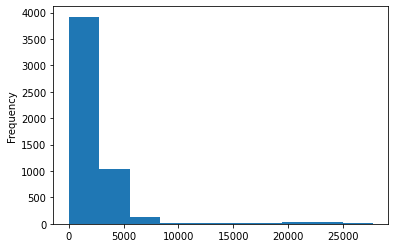

In [51]:
#histograma sin excluir los outliers
planetas['distance'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

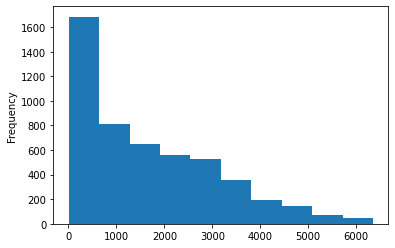

In [52]:
# Histograma excluyendo los datos
InsideData.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

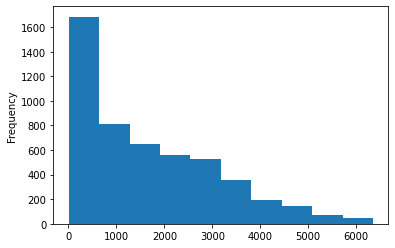

In [53]:
#histograma sin los outliers
planetas2['distance'].plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

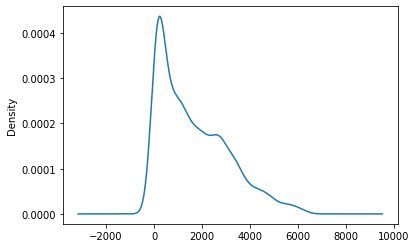

In [54]:
planetas2['distance'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

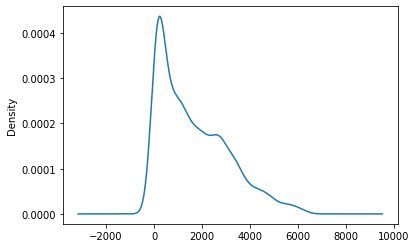

In [55]:
InsideData.plot(kind = 'kde')

In [66]:
px.histogram(InsideData, x='distance')

### variable metodo de deteccion con distancia y magnitud estelar

In [57]:
planetas = planetas[planetas["distance"].notnull()]
planetas = planetas[planetas["stellar_magnitude"].notnull()]

x = "detection_method" # selecciona la variable cualitativa o factor
y = ["distance","stellar_magnitude"] # selecciona las variables numéricas

vec_var = np.append(x, y)
df1=(planetas[vec_var].groupby(x).describe().unstack().unstack(1))
df1

count          mean  \
                  detection_method                                      
distance          Astrometry                          1          20.0   
                  Direct Imaging                   52.0         273.0   
                  Disk Kinematics                     1         600.0   
                  Eclipse Timing Variations        16.0      1333.375   
                  Gravitational Microlensing       12.0  13847.916667   
                  Orbital Brightness Modulation     9.0   3692.222222   
                  Pulsar Timing                       1        1647.0   
                  Pulsation Timing Variations       2.0        4206.0   
                  Radial Velocity                1027.0    274.633885   
                  Transit                        3932.0   2123.952696   
                  Transit Timing Variations        24.0   1694.291667   
stellar_magnitude Astrometry                          1         10.05   
                  Direct Imaging                   52.0     10.100879   
                  Disk Kinematics                     1          8.44   
                  Eclipse Timing Variations        16.0     14.853581   
                  Gravitational Microlensing       12.0     24.143833   
                  Orbital Brightness Modulation     9.0     14.524667   
                  Pulsar Timing                       1       20.8671   
                  Pulsation Timing Variations       2.0       13.9675   
                  Radial Velocity                1027.0      8.090357   
                  Transit                        3932.0     13.860135   
                  Transit Timing Variations        24.0     13.390042   

                                                         std      min  \
                  detection_method                                      
distance          Astrometry                            <NA>       20   
                  Direct Imaging                  164.470153     36.0   
                  Disk Kinematics                       <NA>      600   
                  Eclipse Timing Variations       957.651354     69.0   
                  Gravitational Microlensing     6288.812555   1647.0   
                  Orbital Brightness Modulation  1547.610237   1484.0   
                  Pulsar Timing                         <NA>     1647   
                  Pulsation Timing Variations     431.335137   3901.0   
                  Radial Velocity                 498.506771      4.0   
                  Transit                        1650.531395     22.0   
                  Transit Timing Variations       1071.33182    209.0   
stellar_magnitude Astrometry                            <NA>    10.05   
                  Direct Imaging                    4.014558     3.85   
                  Disk Kinematics                       <NA>     8.44   
                  Eclipse Timing Variations         2.006625   12.651   
                  Gravitational Microlensing        7.720002   14.243   
                  Orbital Brightness Modulation      1.31627    12.38   
                  Pulsar Timing                         <NA>  20.8671   
                  Pulsation Timing Variations       1.133492   13.166   
                  Radial Velocity                   2.135192    0.872   
                  Transit                           1.846761     5.65   
                  Transit Timing Variations         1.904502     9.28   

                                                      25%      50%       75%  \
                  detection_method                                             
distance          Astrometry                           20       20        20   
                  Direct Imaging                    134.5    295.0    424.25   
                  Disk Kinematics                     600      600       600   
                  Eclipse Timing Variations        743.25   1293.0    1706.0   
                  Gravitational Microlensing      10487.5  13110

<AxesSubplot:ylabel='Frequency'>

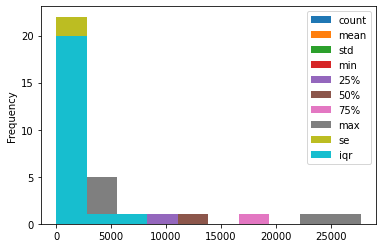

In [81]:
df1.plot(kind = 'hist')

In [58]:
df1['std'] =  df1['std'].fillna('0')
df1['std'] =  df1['std'].astype(float)

In [59]:
df1['count'] =  df1['count'].astype(float)

In [60]:
np.sqrt(df1['count'])

                   detection_method             
distance           Astrometry                        1.000000
                   Direct Imaging                    7.211103
                   Disk Kinematics                   1.000000
                   Eclipse Timing Variations         4.000000
                   Gravitational Microlensing        3.464102
                   Orbital Brightness Modulation     3.000000
                   Pulsar Timing                     1.000000
                   Pulsation Timing Variations       1.414214
                   Radial Velocity                  32.046841
                   Transit                          62.705662
                   Transit Timing Variations         4.898979
stellar_magnitude  Astrometry                        1.000000
                   Direct Imaging                    7.211103
                   Disk Kinematics                   1.000000
                   Eclipse Timing Variations         4.000000
                   Gr

In [76]:
planetas = planetas[planetas["distance"].notnull()]
planetas = planetas[planetas["stellar_magnitude"].notnull()]
x = "detection_method" # selecciona la variable cualitativa o factor
y = ["distance","stellar_magnitude"] # selecciona las variables numéricas

vec_var = np.append(x, y) # vector de las variables

# calcularmos los estadísticos descriptivos:
df1=(planetas[vec_var].groupby(x).describe().unstack().unstack(1))
df1['std'] =  df1['std'].fillna('0')
df1['std'] =  df1['std'].astype(float)
df1['count'] =  df1['count'].astype(float)
df1['se'] = df1['std']/np.sqrt(df1['count'])# error estándar
#df1['ic 95 inferior'] = df1['mean']-1.96*df1['se']
#df1['ic 95 superior'] = df1['mean']+1.96*df1['se']
q1 = df1['25%']
q3 = df1['75%']
df1['iqr'] = q3-q1

display(df1)
type(df1)

<bound method NDFrame._add_numeric_operations.<locals>.std of                                                   count          mean  \
                  detection_method                                      
distance          Astrometry                        1.0          20.0   
                  Direct Imaging                   52.0         273.0   
                  Disk Kinematics                   1.0         600.0   
                  Eclipse Timing Variations        16.0      1333.375   
                  Gravitational Microlensing       12.0  13847.916667   
                  Orbital Brightness Modulation     9.0   3692.222222   
                  Pulsar Timing                     1.0        1647.0   
                  Pulsation Timing Variations       2.0        4206.0   
                  Radial Velocity                1027.0    274.633885   
                  Transit                        3932.0   2123.952696   
                  Transit Timing Variations        24.0   1694

pandas.core.frame.DataFrame

In [64]:
var2 = ['name','discovery_year']
nuevadata = planetas2[var2]
cuenta = nuevadata.groupby(by = 'discovery_year').count()
#px.histogram(planetas2, x='discovery_year', y=cuenta)

In [65]:
px.histogram(nuevadata, x='discovery_year')